In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from collections import defaultdict
from matplotlib import gridspec
from scipy.stats import pearsonr, spearmanr

# use LaTeX fonts in the plot
# https://ercanozturk.org/2017/12/16/python-matplotlib-plots-in-latex/
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
sns.set()
sns.set_style('whitegrid')

# bound plot

In [89]:
df = pd.read_csv('experiments/results/ig-bound-evaluation-aggregate.csv')
aaa = df.columns.tolist()
aaa[0] = 'metric'
df.columns = aaa
df

,metric,aa,vax,count,mean,std,min,25%,50%,75%,max
0,alleles,135,conservation,2.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
1,alleles,135,coverage,2.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
2,alleles,135,immunogen,2.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
3,alleles,45,conservation,2.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
4,alleles,45,coverage,2.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
103,rel_pop_coverage,72,coverage,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
104,rel_pop_coverage,72,immunogen,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
105,rel_pop_coverage,90,conservation,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
106,rel_pop_coverage,90,coverage,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [90]:
max_ig = df[df.metric == 'immunogen']['mean'].max()
df.loc[df.metric == 'immunogen', 'mean'] /= max_ig
df.loc[df.metric == 'immunogen', 'std'] /= max_ig

In [91]:
piv = df[
    df.metric.isin(['conservation', 'immunogen', 'norm_prot_coverage'])
].pivot_table('mean', 'vax', ['metric', 'aa'])
piv

metric       conservation                               immunogen            \
aa                    45        72        90        135       45        72    
vax                                                                           
conservation     0.483870  0.438932  0.445348  0.364559  0.246109  0.383222   
coverage         0.229653  0.102843  0.093274  0.119473  0.244772  0.453136   
immunogen        0.047162  0.081520  0.074465  0.056394  0.338361  0.550004   

metric                           norm_prot_coverage                      \
aa                 90        135                45        72        90    
vax                                                                       
conservation  0.506664  0.669933           0.941088  0.970585  0.970585   
coverage      0.563968  0.912304           0.974302  0.992646  0.998182   
immunogen     0.677303  1.000000           0.535520  0.870781  0.894498   

metric                  
aa                 135  
vax                     
conservation  0.979878  
coverage      0.998182  
immunogen     0.924360

In [95]:
vaxmap = {
    'coverage': 'Pathogen Cov.',
    'norm_prot_coverage': 'Pathogen Cov.',
    'immunogen': 'Immunogenicity',
    'conservation': 'Conservation',
}
piv = piv.rename(columns=vaxmap, index=vaxmap)
piv.index.name = 'Maximization Objective'
piv

metric                 Conservation                                \
aa                              45        72        90        135   
Maximization Objective                                              
Conservation               0.483870  0.438932  0.445348  0.364559   
Pathogen Cov.              0.229653  0.102843  0.093274  0.119473   
Immunogenicity             0.047162  0.081520  0.074465  0.056394   

metric                 Immunogenicity                                \
aa                                45        72        90        135   
Maximization Objective                                                
Conservation                 0.246109  0.383222  0.506664  0.669933   
Pathogen Cov.                0.244772  0.453136  0.563968  0.912304   
Immunogenicity               0.338361  0.550004  0.677303  1.000000   

metric                 Pathogen Cov.                                
aa                               45        72        90        135  
Maximization Objective                                              
Conservation                0.941088  0.970585  0.970585  0.979878  
Pathogen Cov.               0.974302  0.992646  0.998182  0.998182  
Immunogenicity              0.535520  0.870781  0.894498  0.924360

In [96]:
p0 = sns.light_palette('C0')
p1 = sns.light_palette('C1')
p2 = sns.light_palette('C2')

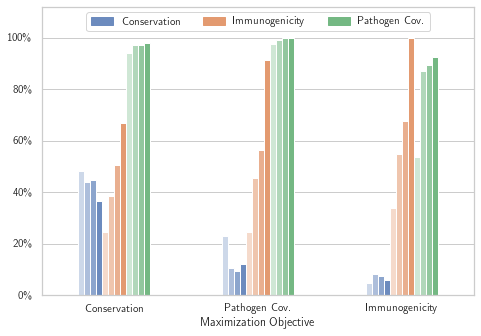

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

piv.plot.bar(color=[
    p0[1], p0[2], p0[3], p0[4],
    p1[1], p1[2], p1[3], p1[4],
    p2[1], p2[2], p2[3], p2[4],
], rot=0, ax=ax)

plt.legend(handles=[
    mpl.patches.Patch(label='Conservation', color=p0[4]),
    mpl.patches.Patch(label='Immunogenicity', color=p1[4]),
    mpl.patches.Patch(label='Pathogen Cov.', color=p2[4]),
], loc='upper center', ncol=3)

plt.ylim(0, 1.12)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'])
plt.grid(False, axis='x')
plt.subplots_adjust(hspace=0, wspace=0, left=0, bottom=0, right=1, top=1)
plt.show()

nice plot but hard to get the point across

In [183]:
pivot_mean = df[
    df.metric.isin(['conservation', 'immunogen', 'norm_prot_coverage'])
].pivot_table('mean', 'aa', ['metric', 'vax']).rename(columns=vaxmap)

pivot_std = df[
    df.metric.isin(['conservation', 'immunogen', 'norm_prot_coverage'])
].pivot_table('std', 'aa', ['metric', 'vax']).rename(columns=vaxmap)

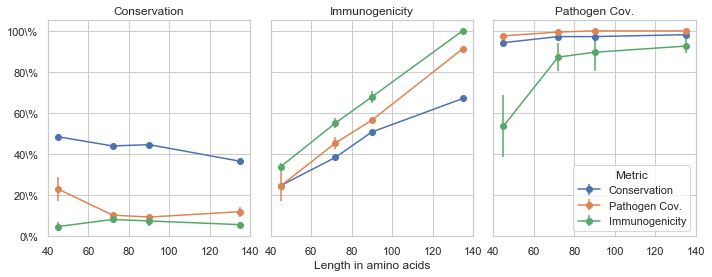

In [186]:
fig = plt.figure(figsize=(9, 3))
grid = gridspec.GridSpec(1, 3, height_ratios=[1], width_ratios=[1, 1, 1],
                         hspace=0.05, wspace=0.1, left=0, bottom=0, right=1, top=1,
                         figure=fig)

for i, (gg, col) in enumerate(zip(grid, pivot_mean.columns.levels[0])):
    ax = fig.add_subplot(gg)
    ppp[col].plot.line(ax=ax, marker='o', yerr=pivot_std[col])
    ax.set_title(col)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(40, 140)
    
    if i > 0:
        ax.set_yticklabels([])
    else:
        ax.set_yticklabels(['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'])
    
    if i == 1:
        ax.set_xlabel('Length in amino acids')
    else:
        ax.set_xlabel('')
    
    if i == 2:
        ax.legend(loc='lower right', title='Metric')
    else:
        ax.get_legend().remove()

plt.savefig('plots/bounds.pdf', bbox_inches='tight')

# high coverage plot

In [148]:
df = pd.read_csv('experiments/results/high-coverage-evaluation-aggregate.csv')

In [149]:
aa = df.columns.tolist()
aa[0] = 'metric'
df.columns = aa

In [150]:
df.head()

,metric,vax,count,mean,std,min,25%,50%,75%,max
0,alleles,popcover,5.0,17.400000,5.412947,14.000000,15.000000,15.000000,16.00,27.000000
1,alleles,strobe,5.0,27.000000,0.000000,27.000000,27.000000,27.000000,27.00,27.000000
2,alleles,strobe-ig,5.0,27.000000,0.000000,27.000000,27.000000,27.000000,27.00,27.000000
3,alleles,strobe-val,5.0,27.000000,0.000000,27.000000,27.000000,27.000000,27.00,27.000000
4,conservation,popcover,5.0,0.412791,0.016112,0.390741,0.408394,0.410247,0.42,0.434572


In [151]:
res = df[df.vax != 'strobe-val'].pivot('metric', 'vax', ['mean', 'std']).loc[['conservation', 'immunogen', 'norm_prot_coverage', 'rel_pop_coverage']]
res

mean                           std                    
vax                 popcover    strobe strobe-ig  popcover    strobe strobe-ig
metric                                                                        
conservation        0.412791  0.454896  0.011823  0.016112  0.017341  0.005021
immunogen           1.282314  1.842797  2.797114  0.013958  0.036225  0.061757
norm_prot_coverage  0.941046  0.942483  0.116742  0.022698  0.021752  0.048611
rel_pop_coverage    0.906953  1.000000  1.000000  0.053777  0.000000  0.000000

In [152]:
max_short = res['mean']['strobe-ig']['immunogen']
res.loc['immunogen'] = res.loc['immunogen'] / max_short  # here we normalize std. as well

In [153]:
res = res.rename(index={
    'conservation': 'Conservation',
    'immunogen': 'Immunogen.\n100\\%%=%.3f' % max_short,
    'norm_prot_coverage': 'Pathogen\nCoverage',
    'rel_pop_coverage': 'Population\nCoverage'
}, columns={
    'strobe': 'GenEv',
    'strobe-ig': 'GenEv$^+$',
    'popcover': 'PopCover',
})

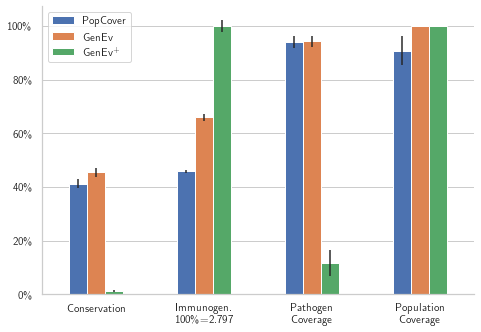

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
res['mean'].plot.bar(rot=0, yerr=res['std'], ax=ax)
plt.grid(False, axis='x')
plt.xlabel('')
plt.legend(['PopCover', 'GenEv', r'GenEv$^+$'])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'])
plt.subplots_adjust(hspace=0, wspace=0, left=0, bottom=0, right=1, top=1)
sns.despine()
plt.savefig('plots/high-cov.pdf', bbox_inches='tight')

# pareto plot

In [297]:
dfs = []
for i in range(1, 6):
    df = pd.read_csv('experiments/results/nef-300-%d/made-tradeoff.csv' % i)
    df['rep'] = i
    dfs.append(df)
df = pd.concat(dfs)
df.head()

,immunogenicity,cleavage,rep
0,2.827592,-5.793313,1
1,2.813919,-9.948271,1
2,2.802330,-11.247685,1
3,2.778687,-13.134337,1
4,2.746615,-15.537919,1


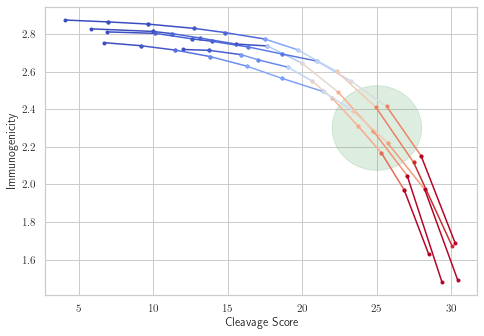

In [373]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
cm = plt.get_cmap('coolwarm')
vmin, vmax = 0.1, 1.2
for rep in df.rep.unique():
    data = df[df.rep == rep].values[:, :2]
    for i in range(len(data) - 1):
        (y1, x1), (y2, x2) = data[i], data[i + 1]
        slope = ((y2 - y1) / 3) / ((x2 - x1) / 40)
        color = 255 * (np.arctan(slope) - vmin) / (vmax - vmin)
        ax.plot([-x1, -x2], [y1, y2], '.-', color=cm(int(color)))


ax.add_patch(mpl.patches.Ellipse((25, 2.3), 6, 0.45, color='C2', alpha=0.2))
plt.xlabel('Cleavage Score')
plt.ylabel('Immunogenicity')
plt.subplots_adjust(hspace=0, wspace=0, left=0, bottom=0, right=1, top=1)
#sns.despine()
plt.savefig('plots/pareto.pdf', bbox_inches='tight')

# advantage

In [16]:
df = pd.read_csv('experiments/results/advantage-evaluation-summary.csv')
df.head()

,Unnamed: 0,size,vax,count,mean,std,min,25%,50%,75%,max
0,alleles,135,optitope,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
1,alleles,135-o4,mosaic,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
2,alleles,135-o8,mosaic,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
3,alleles,180,optitope,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
4,alleles,180-o4,mosaic,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0


In [17]:
aaa = df.columns.tolist()
aaa[0] = 'metric'
df.columns = aaa

In [18]:
df['vax'] = df.apply(lambda x: x['vax'] if '-' not in x['size'] else x['vax'] + '-' + x['size'].split('-')[1], axis=1)
df['size'] = df['size'].apply(lambda x: int(x.split('-')[0]))

In [19]:
df.head()

,metric,size,vax,count,mean,std,min,25%,50%,75%,max
0,alleles,135,optitope,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
1,alleles,135,mosaic-o4,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
2,alleles,135,mosaic-o8,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
3,alleles,180,optitope,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
4,alleles,180,mosaic-o4,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0


In [20]:
df = df.replace({
    'optitope': 'OptiTope',
    'mosaic-o4': 'm4',
    'mosaic-o8': 'm8',
})

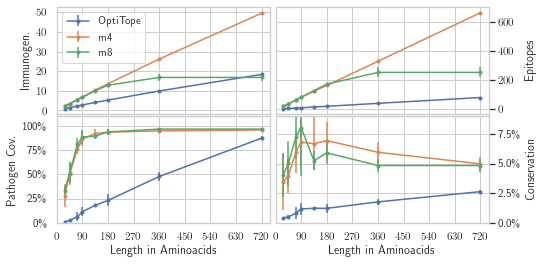

In [21]:
fig = plt.figure(figsize=(6, 3))
gs = gridspec.GridSpec(2, 2, hspace=0.025, wspace=0.025, left=0, bottom=0, right=1, top=1)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

#fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

for i, vax in enumerate(df.vax.unique()):
    data = df[(df.vax == vax) & (df['size'] < 1000)].sort_values('size')
    
    data_ig = data[data.metric == 'immunogen']
    ax1.errorbar(data_ig['size'], data_ig['mean'], yerr=data_ig['std'], fmt='.-', label=vax, color='C%d' % i)
    
    data_eps = data[data.metric == 'num_epitopes']
    ax2.errorbar(data_eps['size'], data_eps['mean'], yerr=data_eps['std'], fmt='.-', label=vax, color='C%d' % i)
    
    data_cov = data[data.metric == 'norm_prot_coverage']
    ax3.errorbar(data_cov['size'], data_cov['mean'], yerr=data_cov['std'], fmt='.-', label=vax, color='C%d' % i)
    
    data_cons = data[data.metric == 'conservation']
    ax4.errorbar(data_cons['size'], data_cons['mean'], yerr=data_cons['std'], fmt='.-', label=vax, color='C%d' % i)

xticks = range(0, 800, 90)
ax1.set_xlim(0, 750)
ax1.set_xticks(xticks)
ax2.set_xlim(0, 750)
ax2.set_xticks(xticks)
ax3.set_xlim(0, 750)
ax3.set_xticks(xticks)
ax4.set_xlim(0, 750)
ax4.set_xticks(xticks)

ax1.tick_params(axis='x', labelbottom=False)
ax2.tick_params(axis='x', labelbottom=False)

ax1.yaxis.set_ticks([0, 10, 20, 30, 40, 50])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_coords(1.22, 0.5)
ax3.yaxis.set_ticks([0, 0.25, 0.50, 0.75, 1.0])
ax3.yaxis.set_ticklabels(['0\%', '25\%', '50\%', '75\%', '100\%'])
ax3.set_ylim(0, 1.1)
ax4.yaxis.tick_right()
ax4.set_ylim(0, 0.09)
ax4.yaxis.set_ticklabels(['0.0\%', '2.5\%', '5.0\%', '7.5\%'])
ax4.yaxis.set_label_coords(1.22, 0.5)

ax3.set_xlabel('Length in Aminoacids')
ax4.set_xlabel('Length in Aminoacids')
ax1.set_ylabel('Immunogen.')
ax2.set_ylabel('Epitopes')
ax3.set_ylabel('Pathogen Cov.')
ax4.set_ylabel('Conservation')

ax1.legend(loc='upper left')

plt.savefig('plots/advantage.pdf', bbox_inches='tight')

# cocktail

We parse the log file and look for this piece:

```
2019-09-24 10:51:58,687 INFO: The polypeptide has 184 epitopes 
2019-09-24 10:51:58,687 INFO: The epitopes have immunogenicity 2.316
2019-09-24 10:51:58,687 INFO: The epitopes cover 27 alleles
2019-09-24 10:51:58,687 INFO: The maximum population coverage is 91.29%
2019-09-24 10:51:58,687 INFO: The epitopes cover 91.29% of the population (100.00% of the maximum)
2019-09-24 10:51:58,688 INFO: The epitopes cover 1736 proteins (90.56% of the total)
2019-09-24 10:51:58,688 INFO: The average epitope conservation is 13.17%
```

Every piece is about a different chain, exept for the last one which is about the vaccine as a whole.

In [149]:
import re

epis, immunogs, popc, protc, cons = [], [], [], [], []
with open('experiments/results/hiv1bc-full/mosaic-4cocktail-evaluation.log') as f:
    for row in f:
        match = re.search(r'The polypeptide has (\d+) epitopes', row)
        if match:
            epis.append(int(match.group(1)))
            continue
        
        match = re.search(r'The epitopes have immunogenicity ([0-9.]+)', row)
        if match:
            immunogs.append(float(match.group(1)))
            continue
        
        match = re.search(r'The epitopes cover [0-9.]+% of the population \(([0-9.]+)% of the maximum\)', row)
        if match:
            popc.append(float(match.group(1)) / 100)
            continue
        
        match = re.search(r'The epitopes cover \d+ proteins \(([0-9.]+)% of the total\)', row)
        if match:
            protc.append(float(match.group(1)) / 100)
            continue
        
        match = re.search(r'The average epitope conservation is ([0-9.]+)%', row)
        if match:
            cons.append(float(match.group(1)) / 100)

In [150]:
mos_df = pd.DataFrame({
    'num_epitopes': epis,
    'immunogen': immunogs,
    'rel_pop_coverage': popc,
    'norm_prot_coverage': protc,
    'conservation': cons,
    'vax': ['chain-%d' % i for i in range(len(epis) - 1)] + ['mosaic'],
})
mos_df

,num_epitopes,immunogen,rel_pop_coverage,norm_prot_coverage,conservation,vax
0,46,3.350,1.0,0.8367,0.1628,chain-0
1,46,2.210,1.0,0.9061,0.1377,chain-1
2,46,3.210,1.0,0.8998,0.1647,chain-2
3,46,3.467,1.0,0.9457,0.2915,chain-3
4,184,12.236,1.0,0.9896,0.1892,mosaic


In [151]:
ot_df = pd.read_csv('experiments/results/hiv1bc-full/optitope-p99-evaluation.csv')
ot_df = ot_df.drop(['prot_coverage', 'alleles', 'pop_coverage', 'max_pop_coverage'], axis=1)
ot_df['vax'] = 'optitope'
ot_df

,norm_prot_coverage,num_epitopes,conservation,rel_pop_coverage,immunogen,vax
0,0.989045,24,0.098809,1.0,5.631012,optitope


In [152]:
highig_df = pd.read_csv('experiments/results/hiv1bc-full/mosaic-highig-evaluation.csv')
highig_df = highig_df.drop(['prot_coverage', 'alleles', 'pop_coverage', 'max_pop_coverage'], axis=1)
highig_df['vax'] = 'highig'
highig_df

,norm_prot_coverage,num_epitopes,conservation,rel_pop_coverage,immunogen,vax
0,0.962963,208,0.060747,1.0,14.551378,highig


In [153]:
df = pd.concat([mos_df, ot_df, highig_df], sort=True)
df

,conservation,immunogen,norm_prot_coverage,num_epitopes,rel_pop_coverage,vax
0,0.162800,3.350000,0.836700,46,1.0,chain-0
1,0.137700,2.210000,0.906100,46,1.0,chain-1
2,0.164700,3.210000,0.899800,46,1.0,chain-2
3,0.291500,3.467000,0.945700,46,1.0,chain-3
4,0.189200,12.236000,0.989600,184,1.0,mosaic
0,0.098809,5.631012,0.989045,24,1.0,optitope
0,0.060747,14.551378,0.962963,208,1.0,highig


In [154]:
def num_epis_to_num_aas(x):
    if x['vax'].startswith('chain') or x['vax'] == 'highig':
        return x['num_epitopes'] + 8
    elif x['vax'] == 'mosaic':
        return 0.0
    elif x['vax'] == 'optitope':
        return x['num_epitopes'] * 9
    
df['num_aas'] = df.apply(num_epis_to_num_aas, axis=1)
df.loc[(df.vax == 'mosaic'), 'num_aas'] = df[df.vax.str.startswith('chain-')].num_aas.sum()

max_short, max_aas = df.immunogen.max(), df.num_aas.max()
df.immunogen = df.immunogen / max_short
df.num_aas = df.num_aas / max_aas

In [155]:
res = df.drop(['vax', 'num_epitopes'], axis=1).T
res.columns = df.vax
res

vax,chain-0,chain-1,chain-2,chain-3,mosaic,optitope,highig
conservation,0.162800,0.137700,0.164700,0.291500,0.189200,0.098809,0.060747
immunogen,0.230219,0.151876,0.220598,0.238259,0.840883,0.386974,1.000000
norm_prot_coverage,0.836700,0.906100,0.899800,0.945700,0.989600,0.989045,0.962963
rel_pop_coverage,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
num_aas,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000


In [156]:
res = res.rename(index={
    'conservation': 'Epitope\nConservation',
    'immunogen': 'Immunogen.\n100\\%%=%.3f' % max_short,
    'norm_prot_coverage': 'Pathogen\nCoverage',
    'rel_pop_coverage': 'Population\nCoverage',
    'num_aas': 'Amino Acids\n100\\%%=%d' % max_aas,
})

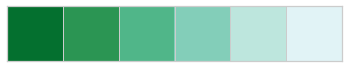

In [157]:
sns.palplot(sns.color_palette("BuGn_r"))

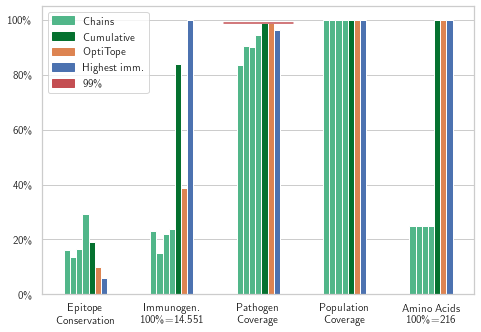

In [158]:
pal = sns.color_palette("BuGn_r")
res.plot.bar(color=[
    #pal[0], pal[1], pal[2], pal[3], 'C2', 'C1'
    pal[2], pal[2], pal[2], pal[2], pal[0], 'C1', 'C0'
], rot=0, legend=False)
plt.plot([1.6, 2.4], [0.99, 0.99], color='C3')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'])

plt.legend(handles=[
    mpatches.Patch(color=pal[2], label='Chains'),
    mpatches.Patch(color=pal[0], label='Cumulative'),
    mpatches.Patch(color='C1', label='OptiTope'),
    mpatches.Patch(color='C0', label='Highest imm.'),
    mpatches.Patch(color='C3', label='99\%'),
])
plt.grid(False, axis='x')

plt.subplots_adjust(hspace=0, wspace=0, left=0, bottom=0, right=1, top=1)
#sns.despine()
plt.savefig('plots/cocktail.pdf', bbox_inches='tight')

# correlate coverage with variations and immunogenicity

## find covered positions

In [5]:
def read_fasta(fname):
    with open(fname) as f:
        prots = {}
        for row in f:
            row = row.strip()
            if row.startswith('>'):
                pid = row[1:]
                prots[pid] = []
            else:
                prots[pid].append(row)
    return {pid: ''.join(ps) for pid, ps in prots.items()}

prots = read_fasta('experiments/resources/hiv1-bc-nef.fasta')

In [6]:
def read_vax(vax_file):
    with open(vax_file) as f:
        _ = next(f)
        peps = [r.split(',')[-1][:-1] for r in f]
    return peps


vax_short = read_vax('experiments/results/hiv1bc-full/mosaic-entropy-short.csv')
vax_sob = read_vax('experiments/results/hiv1bc-full/optitope-entropy.csv')
vax_mid = read_vax('experiments/results/hiv1bc-full/mosaic-entropy-mid.csv')
vax_long = read_vax('experiments/results/hiv1bc-full/mosaic-entropy-long.csv')

In [7]:
def find_coverage_by_protein(prots, vax, sort=False):
    # step 1: find all occurrences of all epitopes
    vax = set(vax)
    peps = defaultdict(list)
    for i, pp in enumerate(prots.values()):
        for j in range(len(pp) - 8):
            seq = pp[j:j+9]
            if seq in vax:
                peps[seq].append((i, j))
    
    # step 2: aggregate the positions by protein
    mat = np.zeros((len(prots), max(len(p) for p in prots.values())))
    for poss in peps.values():
        for i, j in poss:
            mat[i, j:j+9] += 1
    
    # step 3: sort by similarity
    if sort:
        link = hierarchy.linkage(mat, 'ward')
        idx = hierarchy.leaves_list(link)
        mat = mat[idx]
    
    return mat


mat_short = find_coverage_by_protein(prots, vax_short)
mat_mid = find_coverage_by_protein(prots, vax_mid)
mat_long = find_coverage_by_protein(prots, vax_long)
mat_sob = find_coverage_by_protein(prots, vax_sob)

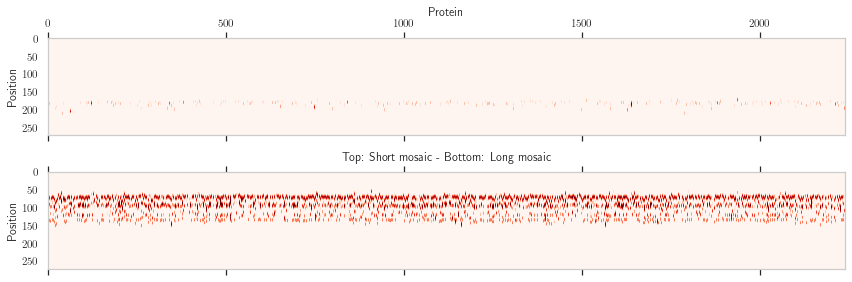

In [8]:
idx = np.random.choice(len(prots), len(prots))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
ax1.matshow(mat_short[idx].T, cmap='Reds')
ax1.grid(False)
ax1.set_xlabel('Protein')
ax1.xaxis.set_label_position('top') 
ax1.set_ylabel('Position')
ax2.set_ylabel('Position')
ax2.matshow(mat_long[idx].T, cmap='Reds')
ax2.grid(False)
ax2.set_title('Top: Short mosaic - Bottom: Long mosaic')
ax2.tick_params(axis='x', labeltop=False)
fig.set_tight_layout(True)
fig.subplots_adjust(left=0, bottom=-0.35, right=1, top=1, wspace=0, hspace=0)
fig.savefig('plots/epitopes-positions.pdf', bbox_inches='tight')

## find immunogenicity by position

In [9]:
with open('experiments/results/hiv1bc-full/made-epitopes.csv') as f:
    _ = next(f)
    epitope_immunogen = {row.split(',')[-1][:-1]: float(row.split(',')[0]) for row in f}

peps = defaultdict(list)
for i, pp in enumerate(prots.values()):
    for j in range(len(pp) - 8):
        seq = pp[j:j+9]
        if seq in epitope_immunogen:
            peps[seq].append((i, j))

# step 2: aggregate the positions by protein
mat = np.zeros((len(prots), max(len(p) for p in prots.values())))
counts = np.zeros((len(prots), max(len(p) for p in prots.values())))
for pep, positions in peps.items():
    for i, j in positions:
        mat[i, j:j+9] += epitope_immunogen[pep]
        counts[i, j:j+9] += 1

#avg = mat.sum(axis=0) / counts.sum(axis=0)
#ig_val = np.where(np.isfinite(avg), avg, 0.0)
ig_mat = mat

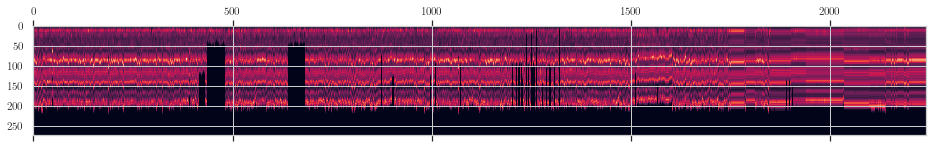

In [10]:
plt.matshow(ig_mat.T)

## find entropy by position

In [11]:
# from https://mafft.cbrc.jp/alignment/server/
aligned = read_fasta('C:/Users/edo/Downloads/aligned.fasta')

In [12]:
aminos = sorted(set(a for p in prots.values() for a in p)) + ['-']
counts = np.zeros((max(len(a) for a in aligned.values()), len(aminos) + 1))
for p in aligned.values():
    for i, a in enumerate(p):
        counts[i, aminos.index(a)] += 1

In [13]:
# remove gaps from aligned counts
#aminocounts = np.array([c for c in counts if np.argmax(c) < len(aminos) - 1])
aminocounts = counts

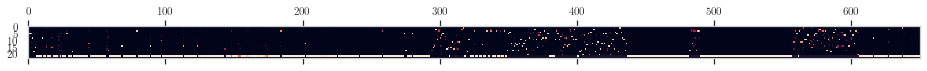

In [14]:
plt.matshow(aminocounts.T)
plt.grid(False)

In [15]:
# aggregate counts for same position
# idea 1: just sum how many different aminoacids
ss = np.sum(aminocounts > 0, axis=1)

# idea 2: entropy
ps = aminocounts / np.sum(aminocounts, axis=1, keepdims=True)
es = -ps * np.log(ps)
ss = np.sum(np.where(np.isfinite(es), es, 0.0), axis=1)

# smooth
variants = pd.Series(ss).rolling(9, center=True, win_type='triang').mean()

C:\Users\edo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\edo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


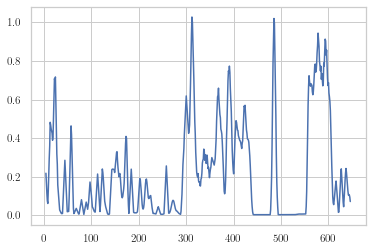

In [16]:
plt.plot(variants)

## align immunogenicity and coverage

In [17]:
# step 3: use alignments
ordered_alignments = [aligned[k] for k in prots]

def align_matrix(mat):
    # mat is (proteins,positions)
    # expand the positions to account for the alignment
    res = np.zeros((len(mat), max(len(a) for a in ordered_alignments)))
    for i, values in enumerate(mat):
        cursor = 0
        for j, a in enumerate(ordered_alignments[i]):
            if a != '-':
                res[i, j] = mat[i, cursor]
                cursor += 1
    return res

ig_ali = align_matrix(ig_mat)
short_ali = align_matrix(mat_short)
mid_ali = align_matrix(mat_mid)
long_ali = align_matrix(mat_long)
sob_ali = align_matrix(mat_sob)

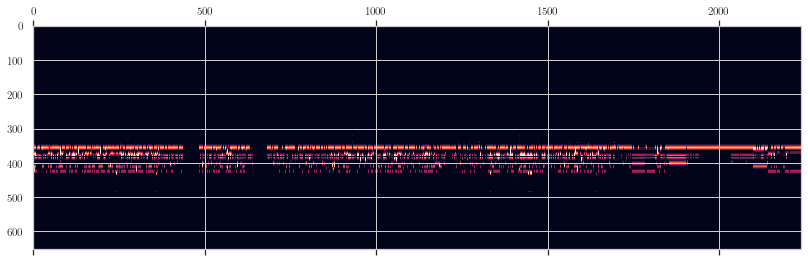

In [18]:
plt.matshow(long_ali.T)

In [21]:
consensus_positions = np.argmax(counts, axis=1) < len(aminos) - 1

cov_long = long_ali.sum(axis=0)[consensus_positions]
cov_long /= cov_long.max()

cov_mid = mid_ali.sum(axis=0)[consensus_positions]
cov_mid /= cov_mid.max()

cov_short = short_ali.sum(axis=0)[consensus_positions]
cov_short /= cov_short.max()

cov_sob = sob_ali.sum(axis=0)[consensus_positions]
cov_sob /= cov_sob.max()

cov_ig = ig_ali.sum(axis=0)[consensus_positions] / len(prots)
ent_smo = variants[consensus_positions]
ent = ss[consensus_positions]

## correlations

In [98]:
agg = pd.DataFrame({
    'Immun.': cov_ig,
    'Entropy': ent_smo,
    'Long': cov_long,
    'Short': cov_short,
    'EpiMix': cov_sob,
})

In [99]:
corrs = agg.corr()
corrs

,Immun.,Entropy,Long,Short,EpiMix
Immun.,1.000000,0.027864,0.197406,0.132173,0.560241
Entropy,0.027864,1.000000,-0.300702,0.269320,0.072748
Long,0.197406,-0.300702,1.000000,-0.134338,0.037465
Short,0.132173,0.269320,-0.134338,1.000000,0.029149
EpiMix,0.560241,0.072748,0.037465,0.029149,1.000000


## plot everything together

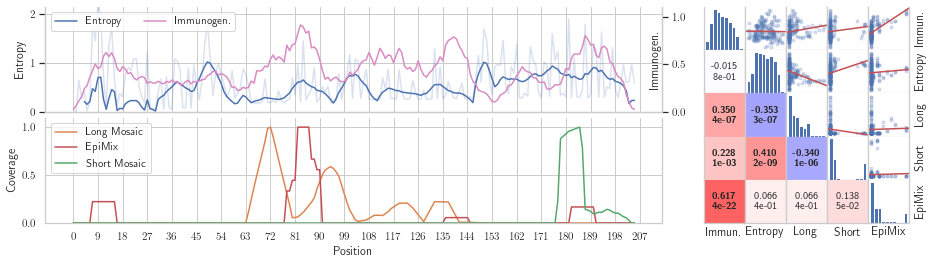

In [295]:
fig = plt.figure(figsize=(12, 3))

gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[3, 1],
                       hspace=0.05, wspace=0.1, left=0, bottom=0, right=1, top=1,
                       figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

ax12 = ax1.twinx()
p1 = ax1.plot(ent_smo.values, color='C0', label='Entropy')
ax1.plot(ent, color='C0', alpha=0.2)
p2 = ax12.plot(cov_ig, color='C6', label='Immunogen.')

p3 = ax2.plot(cov_mid, color='C1', label='Long Mosaic')
p5 = ax2.plot(cov_sob, color='C3', label='EpiMix')
p4 = ax2.plot(cov_short, color='C2', label='Short Mosaic')

# adjust chart
ax1.set_ylabel('Entropy')
ax12.set_ylabel('Immunogen.')
ax12.yaxis.set_label_coords(0.98, 0.5)
ax1.tick_params(axis='x', labelbottom=False)
ax1.grid(True, axis='x')
ax12.grid(False)

ax1.legend(p1 + p2, [p.get_label() for p in p1 + p2], ncol=2, loc='upper left')
ax2.legend(ncol=1, loc='upper left')
ax2.set_xlabel('Position')
ax2.set_ylabel('Coverage')

ax1.set_xticks(range(0, 210, 9))
ax2.set_xticks(range(0, 210, 9))

ax1.set_ylim(0, 2.15)
ax12.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)

# scatter matrix
cm = plt.get_cmap('bwr')
gs00 = gridspec.GridSpecFromSubplotSpec(5, 5, subplot_spec=gs[:,1], hspace=0, wspace=0)
for i in range(len(corrs)):
    for j in range(len(corrs)):
        plot = fig.add_subplot(gs00[i, j])
        
        plot.set_xticks([])
        plot.set_yticks([])

        # write correlation coeff and pval in the lower triangular half
        xs, ys = agg.iloc[4:-4, j], agg.iloc[4:-4, i]
        if i > j:
            corr = spearmanr(xs, ys)
            plot.set_facecolor(cm(int(128 + corr[0] * 128)))
            
            # bold if significant (with bonferroni correction)
            if corr[1] < 0.05 / 10:
                fmt = '\\textbf{{{:.3f}}}\n\\textbf{{{:.0e}}}'
            else:
                fmt = '{:.3f}\n{:.0e}'

            plot.text(0.5, 0.5, fmt.format(*corr),
                      fontdict={'size': 'small'},
                      horizontalalignment='center',
                      verticalalignment='center',
                      weight='bold',
                      transform=plot.transAxes)

        # add regression line to upper triangular half
        elif i < j:
            plot.scatter(xs, ys, alpha=0.2, marker='.')
            xs = np.vstack([xs, np.ones(len(xs))])
            ws = np.linalg.inv(xs.dot(xs.T) + 1e-6 * np.eye(2)).dot(xs).dot(ys)
            xlims, ylims = plot.get_xlim(), plot.get_ylim()
            reg = xlims[0] * ws[0] + ws[1], xlims[1] * ws[0] + ws[1]
            plot.plot(xlims, reg, 'C3')
            plot.set_ylim(ylims)
            plot.set_xlim(xlims)

        # histogram on the diagonal
        else:
            plot.hist(xs)
            plot.set_yscale('log')
            plot.grid(False)
            plot.tick_params(axis='both', which='both', left=False,
                             bottom=False, labelleft=False)

        # put labels on the bottom / right
        if j == len(corrs) - 1:
            plot.set_ylabel(corrs.columns[i])
            plot.yaxis.set_label_coords(1.4, 0.5)
        if i == len(corrs) - 1:
            plot.set_xlabel(corrs.columns[j])

sns.despine(fig, ax2, top=True, right=False)

fig.savefig('plots/positions-entropy.pdf', bbox_inches='tight')

# show peptides overlap

In [169]:
def load_epis(fname):
    with open(fname) as f:
        _ = next(f)
        epis = []
        for row in f:
            epis.append(row[:-1].split(',')[-1])
    return {e: i for i, e in enumerate(sorted(epis))}


epis = [
    load_epis('experiments/results/nef-300-%d/made-epitopes.csv' % i)
    for i in range(1, 6)
]

all_epis = load_epis('experiments/results/hiv1bc-full/made-epitopes.csv')

In [273]:
# pairwise overlaps
ovs = np.zeros((len(epis), len(epis)))
for i in range(len(epis)):
    for j in range(len(epis)):
        ovs[i, j] = len(epis[i].keys() & epis[j].keys()) / max(len(epis[i].keys()), len(epis[j].keys()))
ovs

array([[1.        , 0.44366403, 0.47742082, 0.4796778 , 0.46832628],
       [0.44366403, 1.        , 0.46136962, 0.47600234, 0.45899993],
       [0.47742082, 0.46136962, 1.        , 0.45846881, 0.45892819],
       [0.4796778 , 0.47600234, 0.45846881, 1.        , 0.46911543],
       [0.46832628, 0.45899993, 0.45892819, 0.46911543, 1.        ]])

In [276]:
coverage = np.zeros((len(epis), len(all_epis)))
for e, i in all_epis.items():
    for j, b in enumerate(epis):
        if e in b:
            coverage[j, i] = 1

np.mean(coverage, axis=1)  # portion of covered epitopes 

array([0.25003794, 0.2592958 , 0.25037942, 0.25671574, 0.26443694])

In [204]:
# try to sort stuff decently
mat = np.array(sorted(coverage.T, key=lambda x: sum(x))).T
link = hierarchy.linkage(mat, 'ward')
idx = hierarchy.leaves_list(link)
mat = mat[idx]

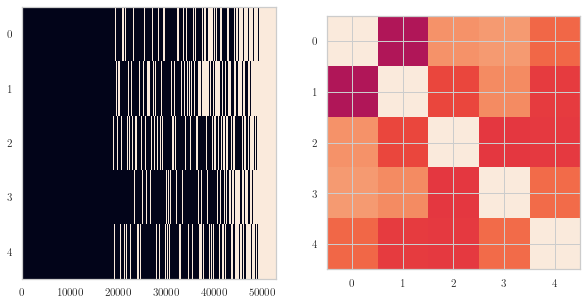

In [274]:
fig = plt.figure(figsize=(10, 5))
ax1, ax2 = fig.subplots(1, 2)

ax1.imshow(mat, aspect='auto')
ax1.grid(False)

ax2.imshow(ovs, vmin=0.4, vmax=0.5)